STA365 HW2

Ray Wen

1005794384


# Part 1

![part1](part1_screenshot.png)

# Part 2

1. Make the "Classic Bayes" figure, but instead of a single likelihood, plot the individual likelihoods of each observation. *Hint: Consider the code...*

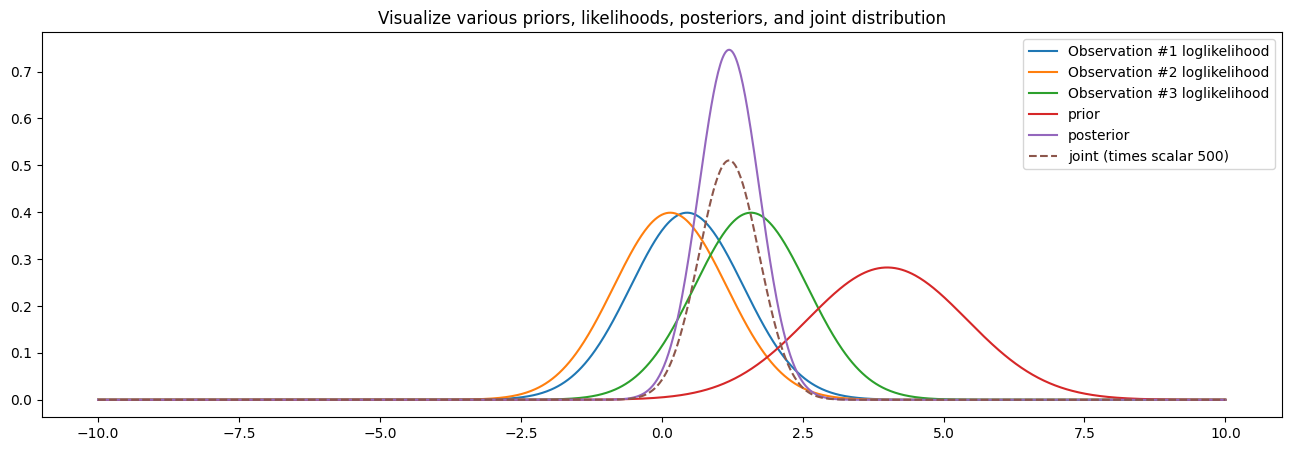

In [1]:
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt

np.random.seed(131)

n = 3
x = stats.norm(loc=0,scale=1).rvs(n)
theta_0,tau = 4,1/2
parameter_domain = np.linspace(-10,10,1001)

prior = stats.norm(loc=theta_0, scale=1/tau**0.5).pdf(parameter_domain)
c,c2 = 500,10

plt.figure(figsize=(16,5))

# plot individual likelihoods of each obvservation
for i, xi in enumerate(x):
    xi_arr = np.array(xi)
    xi_arr = xi_arr.reshape((1,1))
    likelihood_per_obs = stats.norm.pdf((xi_arr)*np.ones(parameter_domain.shape), loc=parameter_domain, scale=1).prod(axis=0)
    plt.plot(parameter_domain, likelihood_per_obs, label="Observation #"+str(i+1)+" loglikelihood")

likelihood = stats.norm.pdf((x[:,np.newaxis])*np.ones(parameter_domain.shape), loc=parameter_domain, scale=1).prod(axis=0)
joint = c*likelihood*prior
posterior = stats.norm(loc=(tau*theta_0+x.sum())/(tau+n), scale=1/(tau+n)**0.5).pdf(parameter_domain)

plt.plot(parameter_domain, prior, label="prior")
plt.plot(parameter_domain, posterior, label="posterior")
plt.plot(parameter_domain, joint, linestyle="--", label="joint (times scalar "+str(c)+")")
plt.legend()
plt.title("Visualize various priors, likelihoods, posteriors, and joint distribution"); 

2. Make the "Classic Bayes" figure for the normal-normal model on a log scale. *Hint: plot loglikehood, prior logpdf, and the log of the joint distribution using* `stats.norm.logpdf()`

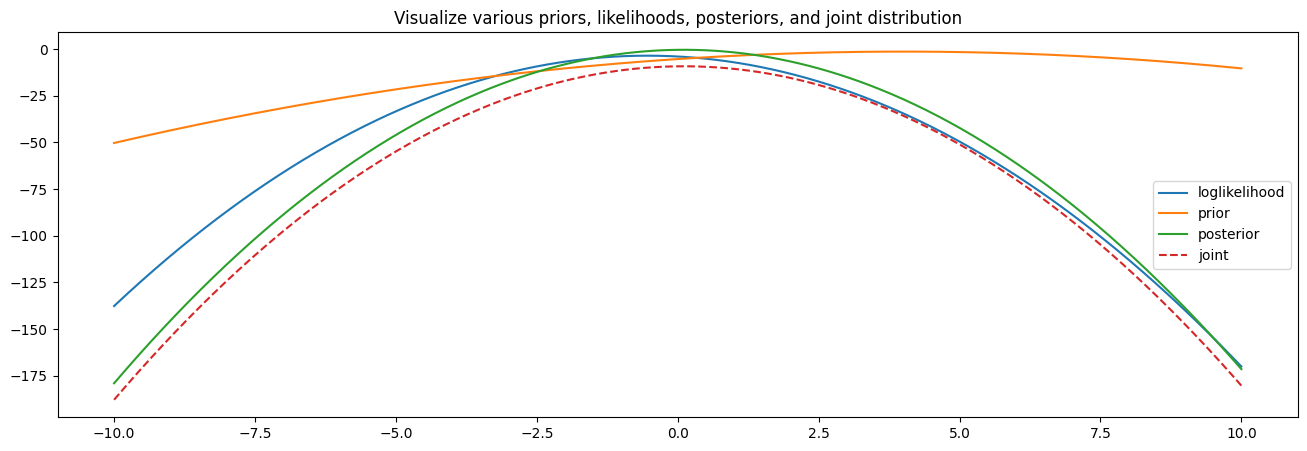

In [2]:
n = 3
x = stats.norm(loc=0,scale=1).rvs(n)
theta_0 = 4
tau = 1/2
parameter_domain = np.linspace(-10,10,1001)

log_likelihood = np.sum(stats.norm.logpdf((x[:,np.newaxis])*np.ones(parameter_domain.shape), loc=parameter_domain, scale=1), axis=0)
log_prior = stats.norm(loc=theta_0, scale=1/tau**0.5).logpdf(parameter_domain) 

joint = log_likelihood+log_prior
posterior = stats.norm(loc=(tau*theta_0+x.sum())/(tau+n), scale=1/(tau+n)**0.5).logpdf(parameter_domain)

plt.figure(figsize=(16,5))
plt.plot(parameter_domain, log_likelihood, label="loglikelihood")
plt.plot(parameter_domain, log_prior, label="prior")
plt.plot(parameter_domain, posterior, label="posterior")
plt.plot(parameter_domain, joint, linestyle="--", label="joint")
plt.legend()
plt.title("Visualize various priors, likelihoods, posteriors, and joint distribution"); 

3. What is the ***posterior distribution*** of a **normal likelihood** with $p(\theta) \propto 1$?

With a prior distribution that is proportional to 1, which means it is constant, with a normal distribution likelihood, the posterior distribution will be be determined by the likelihood function only. 

Thus, the posterior will also be a normal distribution.



4. What's the difference between a ***log likelihood*** and ***log posterior*** when an ***improper prior*** is used? *Hint: is has something to do with the* ***log of the marginal likelihood constant***. [Or, another way to start thinking about this is to instead as the question: What's the difference between a ***likelihood*** and ***posterior*** when an ***improper prior*** is used? *Hint: is has something to do with the* ***marginal likelihood constant***.]

The log posterior is given as:

log posterior = log prior + log likelihood - log marginal likelihood constant

In the case of an improper prior that is $\propto 1$, then we know that log prior $\propto 0$. 

So the equation above becomes:

log posterior = log likelihood - log marginal likelihood constant

And from here we can see that the difference between a log likelihood and log posterior is the log marginal likelihood constant when an improper prior is used. 
